In [1]:
import fastf1 as ff1
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [36]:
ff1.Cache.enable_cache('cache_race/')

In [37]:
round_ = 21 # Saudi Arabia = 21
q = ff1.get_session(2021, round_, 'R') # Get Race Data
q_laps = q.load_laps(with_telemetry=True)
q_laps.head(2)

core           INFO 	Loading laps for Saudi Arabian Grand Prix - Race [v2.1.12]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tr

Time DriverNumber                LapTime  LapNumber  \
0 0 days 01:03:12.940000           44                    NaT          1   
1 0 days 01:04:46.960000           44 0 days 00:01:34.020000          2   

   Stint             PitOutTime PitInTime            Sector1Time  \
0      1 0 days 00:24:06.512000       NaT                    NaT   
1      1                    NaT       NaT 0 days 00:00:34.811000   

             Sector2Time            Sector3Time     Sector1SessionTime  \
0 0 days 00:00:29.642000 0 days 00:00:29.221000                    NaT   
1 0 days 00:00:29.851000 0 days 00:00:29.358000 0 days 01:03:47.751000   

      Sector2SessionTime     Sector3SessionTime  SpeedI1  SpeedI2  SpeedFL  \
0 0 days 01:02:43.773000 0 days 01:03:13.092000    286.0    302.0    288.0   
1 0 days 01:04:17.602000 0 days 01:04:46.960000    278.0    295.0    293.0   

   SpeedST Compound  TyreLife FreshTyre           LapStartTime      Team  \
0    300.0   MEDIUM      10.0     False 0 days 01:01:37.514000  Mercedes   
1    295.0   MEDIUM      11.0     False 0 days 01:03:12.940000  Mercedes   

  Driver TrackStatus IsAccurate            LapStartDate  
0    HAM           1      False 2021-12-05 17:33:44.732  
1    HAM           1       True 2021-12-05 17:35:20.158

In [41]:
ver_37 = q_laps.pick_driver(33).loc[q_laps.LapNumber == 37]
ver_37_t = ver_37.get_telemetry().add_distance()
ham_37 = q_laps.pick_driver(44).loc[q_laps.LapNumber == 37]
ham_37_t = ham_37.get_telemetry().add_distance()

In [44]:
ver_37_t.head(2)

Date            SessionTime DriverAhead  \
2 2021-12-05 19:18:27.154 0 days 02:46:19.936000               
3 2021-12-05 19:18:27.319 0 days 02:46:20.101000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2               0.004722        0 days 00:00:00  10753    297      8   
3               0.004722 0 days 00:00:00.165000  10760    298      8   

   Throttle  Brake  DRS         Source  RelativeDistance   Status     X    Y  \
2       100      0    0  interpolation          0.000002  OnTrack -1265  148   
3       100      0    0            pos          0.002250  OnTrack -1315  282   

     Z   Distance  
2  118   0.000000  
3  118  13.658333

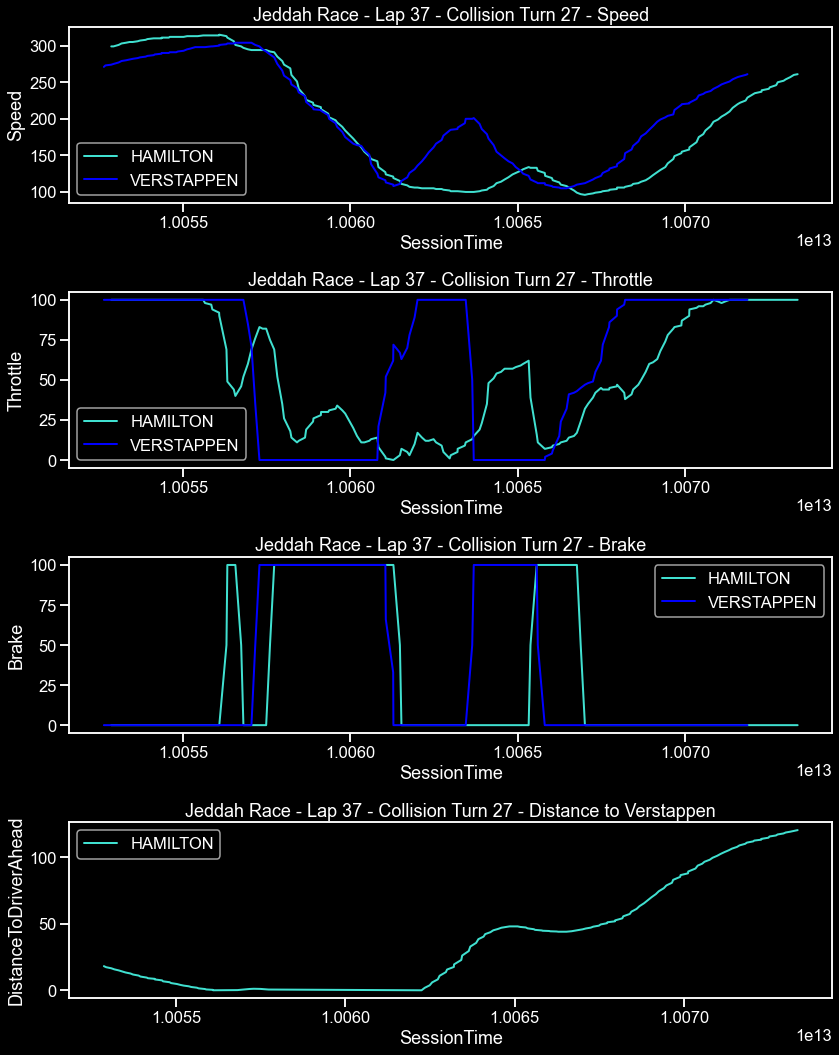

In [63]:
start = 4700
stop = 5800
sub_ver = ver_37_t.loc[(ver_37_t.Distance < stop) & (ver_37_t.Distance > start)]
sub_ham = ham_37_t.loc[(ham_37_t.Distance < stop) & (ham_37_t.Distance > start)]
title = 'Jeddah Race - Lap 37 - Collision Turn 27'

plt.figure(figsize=(12, 15))

plt.subplot(4, 1, 1)
sns.lineplot(x='SessionTime', y='Speed', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='SessionTime', y='Speed', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
plt.title(f"{title} - Speed")

plt.subplot(4, 1, 2)
sns.lineplot(x='SessionTime', y='Throttle', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='SessionTime', y='Throttle', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
plt.title(f"{title} - Throttle")

plt.subplot(4, 1, 3)
sns.lineplot(x='SessionTime', y='Brake', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='SessionTime', y='Brake', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
plt.title(f"{title} - Brake")

plt.subplot(4, 1, 4)
sns.lineplot(x='SessionTime', y='DistanceToDriverAhead', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title(f"{title} - Distance to Verstappen")

plt.tight_layout()
plt.savefig("out/ver_crash_ham_turn_27.png")
plt.show()

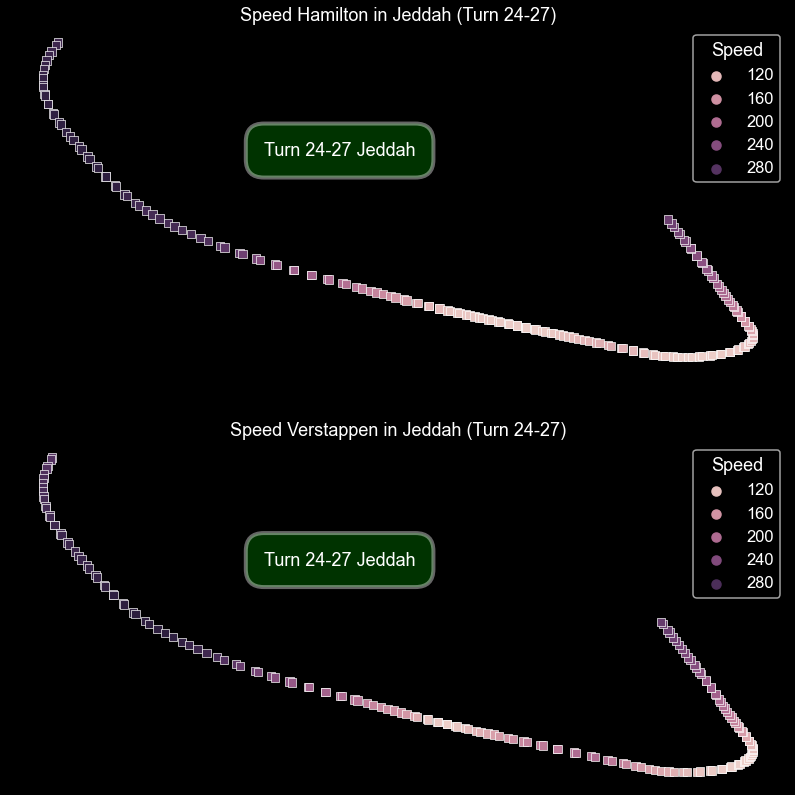

In [69]:
plt.figure(figsize=(14,14))

plt.subplot(2, 1, 1)
sns.scatterplot(x='X', y='Y', data=sub_ham, marker="s", s=70, hue='Speed')
plt.text(-2800, -1300, f"Turn 24-27 Jeddah", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='green', alpha=0.4, linewidth=4))
plt.axis('off')
plt.title("Speed Hamilton in Jeddah (Turn 24-27)")

plt.subplot(2, 1, 2)
sns.scatterplot(x='X', y='Y', data=sub_ver, marker="s", s=70, hue='Speed')
plt.text(-2800, -1300, f"Turn 24-27 Jeddah", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='green', alpha=0.4, linewidth=4))
plt.axis('off')
plt.title("Speed Verstappen in Jeddah (Turn 24-27)")
plt.savefig("out/race_track_ham_ver.png")
plt.show()

In [17]:
crash_lap_ver = q_laps.pick_driver(33).loc[q_laps.pick_driver(33).index == 18].get_telemetry().add_distance()
fastest_ver = q_laps.pick_driver(33).pick_fastest().get_telemetry().add_distance()
fastest_ham = q_laps.pick_driver(44).pick_fastest().get_telemetry().add_distance()

In [29]:
q_laps.pick_driver(33).loc[q_laps.pick_driver(33).index == 18]

Time DriverNumber LapTime  LapNumber  Stint PitOutTime  \
18 0 days 01:16:02.681000           33     NaT         19      5        NaT   

                PitInTime            Sector1Time            Sector2Time  \
18 0 days 01:18:09.028000 0 days 00:00:31.900000 0 days 00:00:27.848000   

              Sector3Time     Sector1SessionTime     Sector2SessionTime  \
18 0 days 00:00:47.176000 0 days 01:14:47.689000 0 days 01:15:15.505000   

       Sector3SessionTime  SpeedI1  SpeedI2  SpeedFL  SpeedST Compound  \
18 0 days 01:18:09.028000    298.0    319.0      NaN    325.0     SOFT   

    TyreLife FreshTyre           LapStartTime      Team Driver TrackStatus  \
18       3.0      True 0 days 01:14:15.667000  Red Bull    VER           1   

   IsAccurate            LapStartDate  
18      False 2021-12-04 17:59:15.679

In [33]:
27.848 - 28.014 - 0.055

-0.22100000000000036

In [34]:
q_laps.pick_driver(44)

Time DriverNumber                LapTime  LapNumber  \
19 0 days 00:18:52.602000           44                    NaT          1   
20 0 days 00:20:55.013000           44 0 days 00:02:02.411000          2   
21 0 days 00:22:23.479000           44 0 days 00:01:28.466000          3   
22 0 days 00:24:55.614000           44                    NaT          4   
23 0 days 00:26:51.197000           44 0 days 00:01:55.583000          5   
24 0 days 00:31:12.621000           44                    NaT          6   
25 0 days 00:33:38.752000           44 0 days 00:02:26.131000          7   
26 0 days 00:42:28.448000           44                    NaT          8   
27 0 days 00:44:06.178000           44 0 days 00:01:37.730000          9   
28 0 days 00:45:34.893000           44 0 days 00:01:28.715000         10   
29 0 days 00:47:51.806000           44 0 days 00:02:16.913000         11   
30 0 days 00:49:19.874000           44 0 days 00:01:28.068000         12   
31 0 days 00:51:30.231000           44 0 days 00:02:10.357000         13   
32 0 days 00:53:16.500000           44 0 days 00:01:46.269000         14   
33 0 days 00:54:44.212000           44 0 days 00:01:27.712000         15   
34 0 days 00:56:39.073000           44 0 days 00:01:54.861000         16   
35 0 days 01:04:59.342000           44                    NaT         17   
36 0 days 01:06:47.446000           44 0 days 00:01:48.104000         18   
37 0 days 01:08:15.481000           44 0 days 00:01:28.035000         19   
38 0 days 01:10:02.800000           44 0 days 00:01:47.319000         20   
39 0 days 01:12:12.172000           44 0 days 00:02:09.372000         21   
40 0 days 01:13:39.683000           44 0 days 00:01:27.511000         22   
41 0 days 01:15:45.229000           44 0 days 00:02:05.546000         23   

    Stint             PitOutTime              PitInTime  \
19      1 0 days 00:16:47.716000                    NaT   
20      1                    NaT                    NaT   
21      1                    NaT                    NaT   
22      1                    NaT                    NaT   
23      2                    NaT 0 days 00:26:49.002000   
24      2 0 days 00:29:18.554000                    NaT   
25      3                    NaT 0 days 00:33:04.958000   
26      3 0 days 00:40:38.935000                    NaT   
27      3                    NaT                    NaT   
28      3                    NaT                    NaT   
29      3                    NaT                    NaT   
30      3                    NaT                    NaT   
31      3                    NaT                    NaT   
32      3                    NaT                    NaT   
33      3                    NaT                    NaT   
34      4                    NaT 0 days 00:56:38.040000   
35      4 0 days 01:03:11.353000                    NaT   
36      4                    NaT                    NaT   
37      4                    NaT                    NaT   
38      5                    NaT 0 days 01:10:01.622000   
39      5 0 days 01:10:27.353000                    NaT   
40      5                    NaT                    NaT   
41      5                    NaT 0 days 01:15:42.972000   

              Sector1Time            Sector2Time            Sector3Time  \
19                    NaT 0 days 00:00:42.886000 0 days 00:00:43.613000   
20 0 days 00:00:44.539000 0 days 00:00:35.030000 0 days 00:00:42.842000   
21 0 days 00:00:32.365000 0 days 00:00:28.171000 0 days 00:00:27.930000   
22 0 days 00:01:07.267000 0 days 00:00:47.974000 0 days 00:00:36.947000   
23 0 days 00:00:32.514000 0 days 00:00:47.767000 0 days 00:00:35.302000   
24                    NaT 0 days 00:00:35.434000 0 days 00:00:32.412000   
25 0 days 00:00:42.001000 0 days 00:00:33.217000 0 days 00:01:10.913000   
26                    NaT 0 days 00:00:32.357000 0 days 00:00:34.310000   
27 0 days 00:00:35.675000 0 days 00:00:30.585000 0 days 00:00:31.470000   
28 0 days 00:00:32.519000 0 d

In [30]:
q_laps.pick_driver(33).pick_fastest()

Time                      0 days 01:09:10.683000
DriverNumber                                  33
LapTime                   0 days 00:01:27.653000
LapNumber                                     16
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:31.955000
Sector2Time               0 days 00:00:28.014000
Sector3Time               0 days 00:00:27.684000
Sector1SessionTime        0 days 01:08:14.985000
Sector2SessionTime        0 days 01:08:42.999000
Sector3SessionTime        0 days 01:09:10.683000
SpeedI1                                    296.0
SpeedI2                                    311.0
SpeedFL                                    300.0
SpeedST                                    316.0
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
LapStartTime        

In [31]:
q_laps.pick_driver(44).pick_fastest()

Time                      0 days 01:13:39.683000
DriverNumber                                  44
LapTime                   0 days 00:01:27.511000
LapNumber                                     22
Stint                                          5
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:32.007000
Sector2Time               0 days 00:00:27.985000
Sector3Time               0 days 00:00:27.519000
Sector1SessionTime        0 days 01:12:44.179000
Sector2SessionTime        0 days 01:13:12.164000
Sector3SessionTime        0 days 01:13:39.683000
SpeedI1                                    299.0
SpeedI2                                    322.0
SpeedFL                                    307.0
SpeedST                                    324.0
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
LapStartTime        

In [35]:
crash_lap_ver

Date            SessionTime DriverAhead  \
2   2021-12-04 17:59:15.679 0 days 01:14:15.667000               
3   2021-12-04 17:59:15.879 0 days 01:14:15.867000               
4   2021-12-04 17:59:15.892 0 days 01:14:15.880000               
5   2021-12-04 17:59:16.099 0 days 01:14:16.087000               
6   2021-12-04 17:59:16.132 0 days 01:14:16.120000          16   
..                      ...                    ...         ...   
931 2021-12-04 18:01:02.279 0 days 01:16:02.267000          16   
932 2021-12-04 18:01:02.374 0 days 01:16:02.362000          16   
933 2021-12-04 18:01:02.499 0 days 01:16:02.487000          16   
934 2021-12-04 18:01:02.614 0 days 01:16:02.602000          16   
935 2021-12-04 18:01:02.693 0 days 01:16:02.681000          16   

     DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2               496.595000        0 days 00:00:00  11270    310      8   
3               496.595000 0 days 00:00:00.200000  11287    311      8   
4               496.595000 0 days 00:00:00.213000  11321    312      8   
5               496.595000 0 days 00:00:00.420000  11321    312      8   
6               496.595000 0 days 00:00:00.453000  11321    313      8   
..                     ...                    ...    ...    ...    ...   
931            1550.679722 0 days 00:01:46.600000      0      0      0   
932            1555.179722 0 days 00:01:46.695000      0      0      0   
933            1559.713056 0 days 00:01:46.820000      0      0      0   
934            1564.246389 0 days 00:01:46.935000      0      0      0   
935            1564.246389 0 days 00:01:47.014000      0      0      0   

     Throttle  Brake  DRS         Source  RelativeDistance   Status     X  \
2         100      0   12  interpolation          0.000002  OnTrack -1270   
3         100      0   12            pos          0.003064  OnTrack -1328   
4         100      0   12            car          0.003264  OnTrack -1331   
5         100      0   12            pos          0.006442  OnTrack -1394   
6         100      0   12            car          0.006950  OnTrack -1403   
..        ...    ...  ...            ...               ...      ...   ...   
931         0      0    8            pos          1.000000  OnTrack  -175   
932         0      0    8            car          1.000000  OnTrack  -175   
933         0      0    8            pos          1.000000  OnTrack  -175   
934         0      0    8            car          1.000000  OnTrack  -175   
935         0      0    8  interpolation          1.000000  OnTrack  -175   

        Y    Z     Distance  
2     156  120     0.000000  
3     319  118    17.277778  
4     329  117    18.404444  
5     498  117    36.344444  
6     524  117    39.213611  
..    ...  ...          ...  
931 -4190  116  5662.658056  
932 -4190  116  5662.658056  
933 -4190  116  5662.658056  
934 -4190  116  5662.658056  
935 -4190  116  5662.658056  

[934 rows x 18 columns]

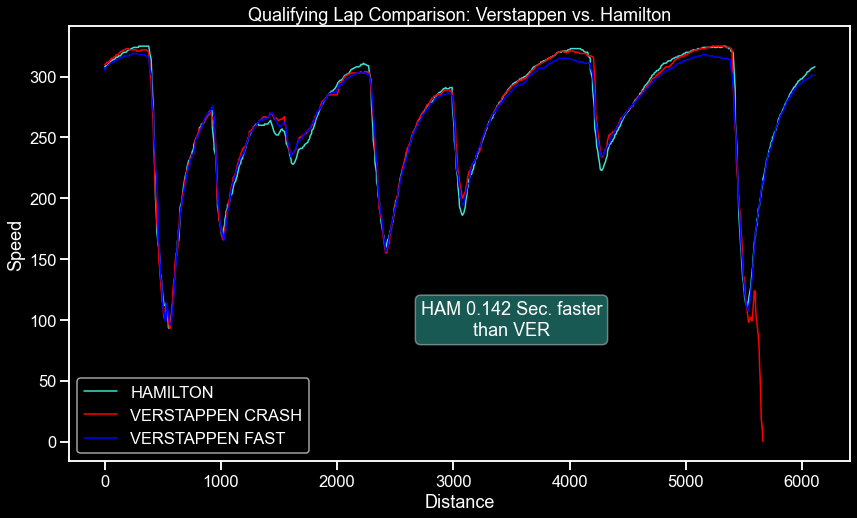

In [24]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(33).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(44).pick_fastest().LapTime.total_seconds(), 3)
sns.lineplot(x='Distance', y='Speed', data=fastest_ham, color="turquoise", linewidth=1.5, label='HAMILTON')
sns.lineplot(x='Distance', y='Speed', data=crash_lap_ver, color="red", linewidth=1.5, label='VERSTAPPEN CRASH')
sns.lineplot(x='Distance', y='Speed', data=fastest_ver, color="blue", linewidth=1.5, label='VERSTAPPEN FAST')
plt.text(3500, 100, f"HAM {delta} Sec. faster\nthan VER", \
    verticalalignment='center', horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='turquoise', alpha=0.4))
plt.title("Qualifying Lap Comparison: Verstappen vs. Hamilton")
plt.savefig("out/q_ver_ham.png")
plt.show()

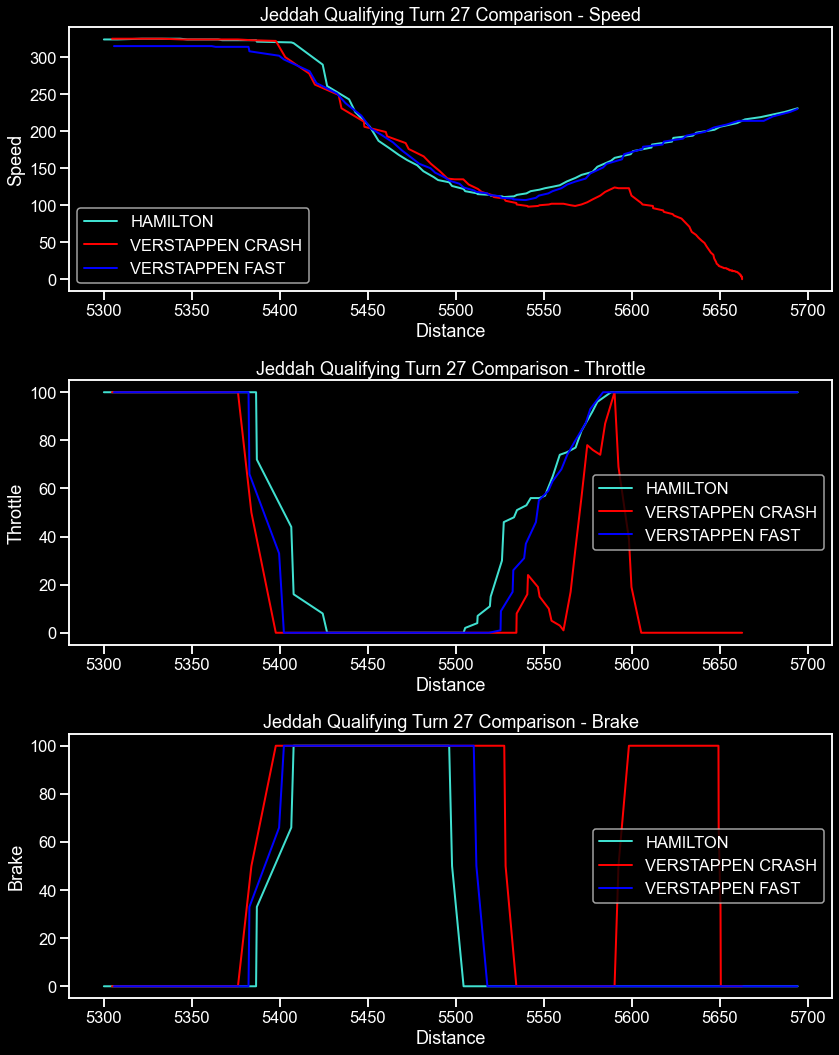

In [27]:
start = 5300
stop = 5700
sub_ver_crash = crash_lap_ver.loc[(crash_lap_ver.Distance < stop) & (crash_lap_ver.Distance > start)]
sub_ver_fast = fastest_ver.loc[(fastest_ver.Distance < stop) & (fastest_ver.Distance > start)]
sub_ham_fast = fastest_ham.loc[(fastest_ham.Distance < stop) & (fastest_ham.Distance > start)]

plt.figure(figsize=(12, 15))

plt.subplot(3, 1, 1)
sns.lineplot(x='Distance', y='Speed', data=sub_ham_fast, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='Distance', y='Speed', data=sub_ver_crash, label='VERSTAPPEN CRASH', color='red', linewidth=2)
sns.lineplot(x='Distance', y='Speed', data=sub_ver_fast, label='VERSTAPPEN FAST', color='blue', linewidth=2)
plt.title("Jeddah Qualifying Turn 27 Comparison - Speed")

plt.subplot(3, 1, 2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ham_fast, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ver_crash, label='VERSTAPPEN CRASH', color='red', linewidth=2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ver_fast, label='VERSTAPPEN FAST', color='blue', linewidth=2)
plt.title("Jeddah Qualifying Turn 27 Comparison - Throttle")

plt.subplot(3, 1, 3)
sns.lineplot(x='Distance', y='Brake', data=sub_ham_fast, label='HAMILTON', color='turquoise', linewidth=2)
sns.lineplot(x='Distance', y='Brake', data=sub_ver_crash, label='VERSTAPPEN CRASH', color='red', linewidth=2)
sns.lineplot(x='Distance', y='Brake', data=sub_ver_fast, label='VERSTAPPEN FAST', color='blue', linewidth=2)
plt.title("Jeddah Qualifying Turn 27 Comparison - Brake")

plt.tight_layout()
plt.savefig("out/ver_crash_compare.png")
plt.show()

## Fastest Lap Analysis

In [34]:
fastest_ham = q_laps.pick_driver(44).pick_fastest().get_telemetry().add_distance()
fastest_ver = q_laps.pick_driver(33).pick_fastest().get_telemetry().add_distance()
fastest_per = q_laps.pick_driver(11).pick_fastest().get_telemetry().add_distance()
fastest_gas = q_laps.pick_driver(10).pick_fastest().get_telemetry().add_distance()
fastest_msc = q_laps.pick_driver(47).pick_fastest().get_telemetry().add_distance()
fastest_maz = q_laps.pick_driver(9).pick_fastest().get_telemetry().add_distance()

In [43]:
q_laps.pick_driver(44).pick_fastest().LapTime.total_seconds()

80.827

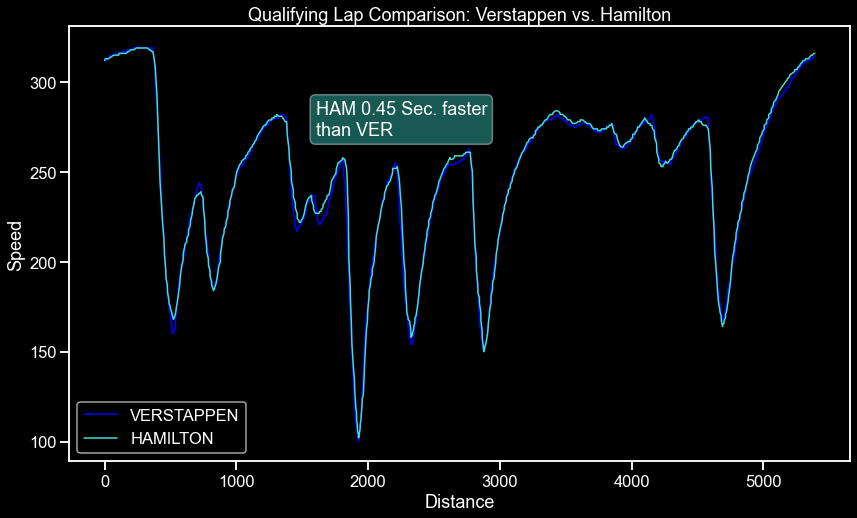

In [56]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(44).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(33).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_ver, color="blue", linewidth=1.5, label='VERSTAPPEN')
sns.lineplot(x='Distance', y='Speed', data=fastest_ham, color="turquoise", linewidth=1.5, label='HAMILTON')
plt.text(1600, 290, f"HAM {delta*(-1)} Sec. faster\nthan VER", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='turquoise', alpha=0.4))
plt.title("Qualifying Lap Comparison: Verstappen vs. Hamilton")
plt.savefig("out/q_ver_ham.png")
plt.show()

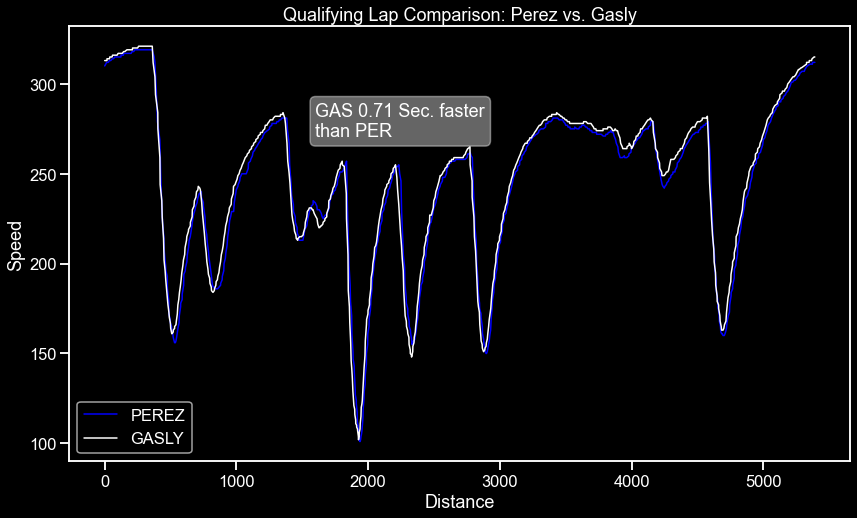

In [54]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(10).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(11).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_per, color="blue", linewidth=1.5, label='PEREZ')
sns.lineplot(x='Distance', y='Speed', data=fastest_gas, color="white", linewidth=1.5, label='GASLY')
plt.text(1600, 290, f"GAS {delta*(-1)} Sec. faster\nthan PER", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.title("Qualifying Lap Comparison: Perez vs. Gasly")
plt.savefig("out/q_gas_per.png")
plt.show()

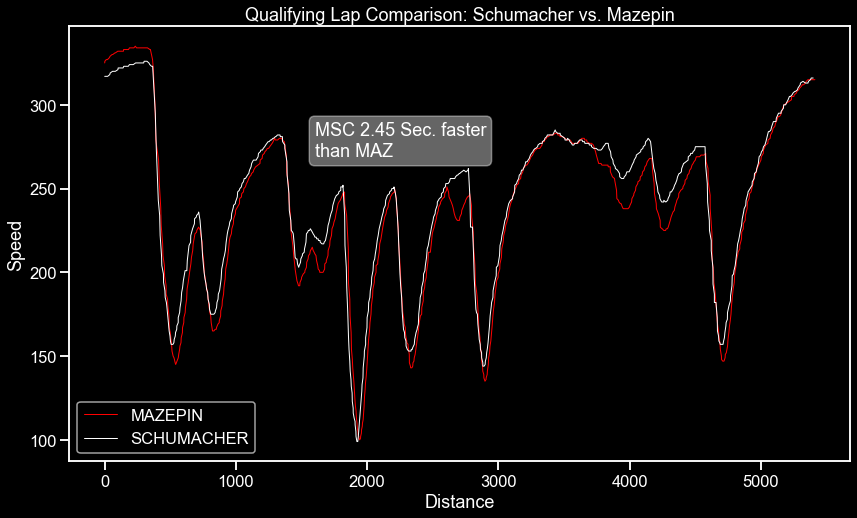

In [50]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(47).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(9).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_maz, color="red", linewidth=1, label='MAZEPIN')
sns.lineplot(x='Distance', y='Speed', data=fastest_msc, color="white", linewidth=1, label='SCHUMACHER')
plt.text(1600, 290, f"MSC {delta*(-1)} Sec. faster\nthan MAZ", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.title("Qualifying Lap Comparison: Schumacher vs. Mazepin")
plt.savefig("out/q_maz_msc.png")
plt.show()

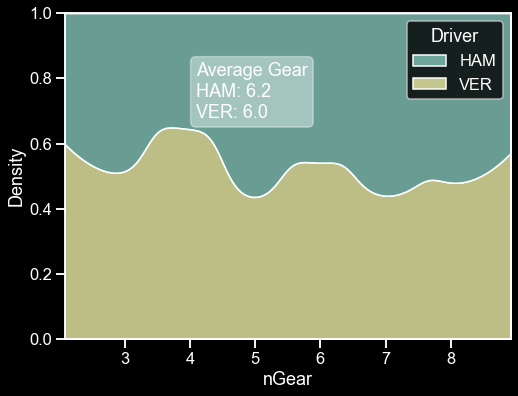

In [124]:
fastest_ham['Driver'] = 'HAM'
fastest_ver['Driver'] = 'VER'
new = fastest_ham.append(fastest_ver, ignore_index=True)
feature = 'nGear'
plt.figure(figsize=(8,6))
sns.kdeplot(data=new, x=feature, hue="Driver", multiple="fill")
plt.text(new[feature].mean()-2, 0.85, f"Average Gear\nHAM: {round(fastest_ham[feature].mean(), 1)}\nVER: {round(fastest_ver[feature].mean(), 1)}", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.show()
#new

In [118]:
gears_ham = fastest_ham[['nGear', 'RPM', 'Speed']].groupby(['nGear'], as_index=False).mean()
gears_ver = fastest_ver[['nGear', 'RPM', 'Speed']].groupby(['nGear'], as_index=False).mean()

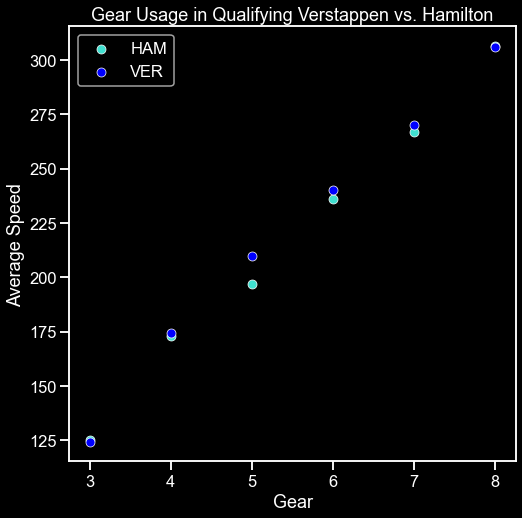

In [134]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='nGear', y='Speed', data=gears_ham, color='turquoise', label='HAM')
sns.scatterplot(x='nGear', y='Speed', data=gears_ver, color='blue', label='VER')
plt.title("Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.ylabel("Average Speed")
plt.xlabel("Gear")
plt.savefig("out/gears_speed.png")
plt.show()

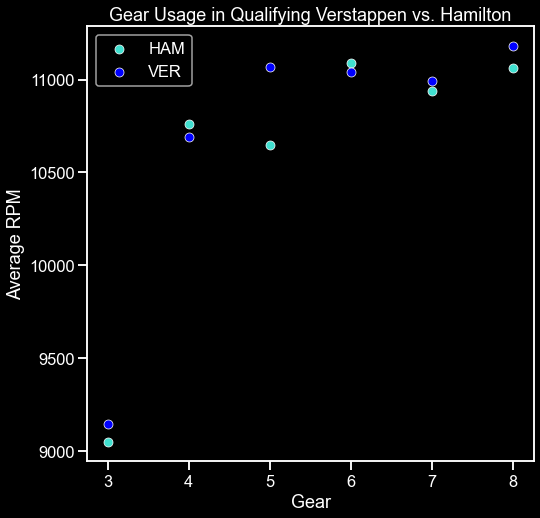

In [132]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='nGear', y='RPM', data=gears_ham, color='turquoise', label='HAM')
sns.scatterplot(x='nGear', y='RPM', data=gears_ver, color='blue', label='VER')
plt.title("Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.ylabel("Average RPM")
plt.xlabel("Gear")
plt.savefig("out/gears_rpm.png")
plt.show()

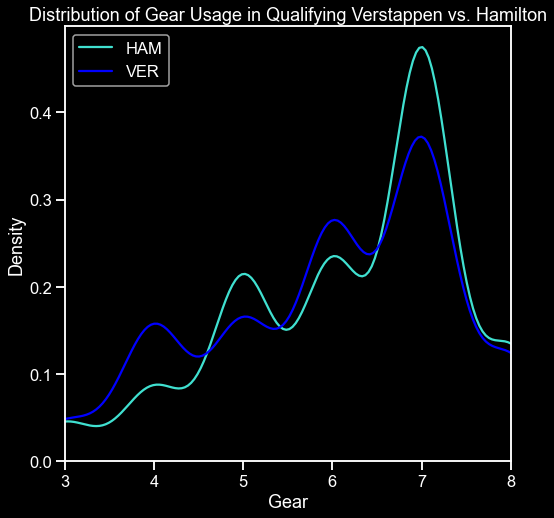

In [133]:
fastest_ham['Driver'] = 'HAM'
fastest_ver['Driver'] = 'VER'
new = fastest_ham.append(fastest_ver, ignore_index=True)
plt.figure(figsize=(8,8))
sns.kdeplot(data=fastest_ham, x="nGear", color='turquoise', label="HAM")
sns.kdeplot(data=fastest_ver, x="nGear", color='blue', label="VER")
plt.title("Distribution of Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.xlabel("Gear")
plt.xlim(3,8)
plt.legend()
plt.savefig("out/gears_distribution.png")
plt.show()

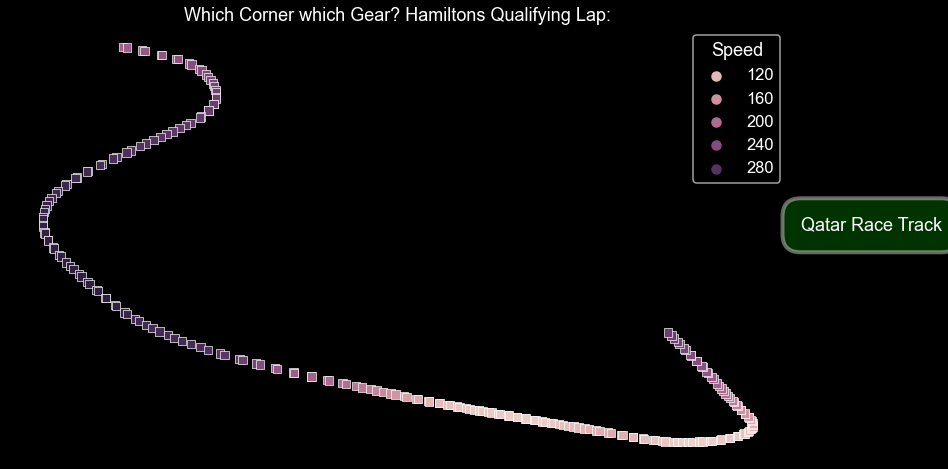

In [52]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='X', y='Y', data=sub_ham, marker="s", s=70, hue='Speed')
plt.text(300, 60, f"Qatar Race Track", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='green', alpha=0.4, linewidth=4))
plt.axis('off')
plt.title("Which Corner which Gear? Hamiltons Qualifying Lap:")
plt.savefig("out/race_track_ham.png")
plt.show()

In [81]:
len(fastest_ham)

707

In [57]:
q_laps.pick_driver(9).pick_fastest()

Time                      0 days 00:34:21.775000
DriverNumber                                   9
LapTime                   0 days 00:01:25.859000
LapNumber                                      8
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.282000
Sector2Time               0 days 00:00:28.710000
Sector3Time               0 days 00:00:28.867000
Sector1SessionTime        0 days 00:33:24.198000
Sector2SessionTime        0 days 00:33:52.908000
Sector3SessionTime        0 days 00:34:21.775000
SpeedI1                                    241.0
SpeedI2                                    279.0
SpeedFL                                    314.0
SpeedST                                    296.0
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
LapStartTime        

## Start Phase Analysis

In [28]:
starting_lap_vb = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'BOT')]
starting_lap_lh = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'HAM')]
starting_lap_mv = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'VER')]
starting_lap_sp = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'PER')]

telemetry_vb = starting_lap_vb.get_telemetry().add_distance()
telemetry_lh = starting_lap_lh.get_telemetry().add_distance()
telemetry_mv = starting_lap_mv.get_telemetry().add_distance()
telemetry_sp = starting_lap_sp.get_telemetry().add_distance()


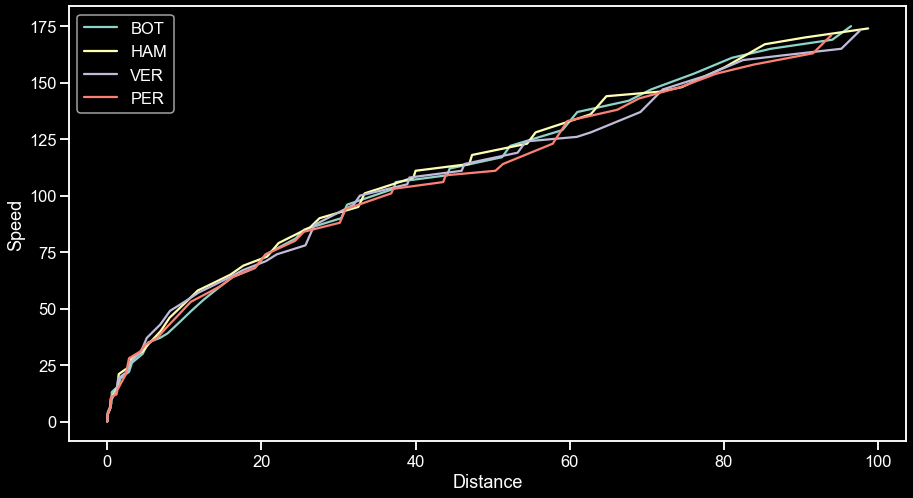

In [34]:
_distance = 100
_y = 'Speed'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

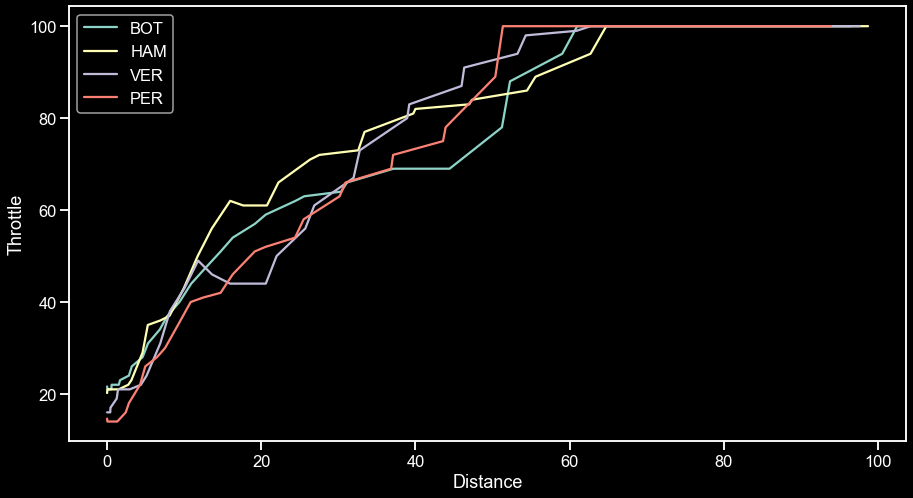

In [32]:
_distance = 100
_y = 'Throttle'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

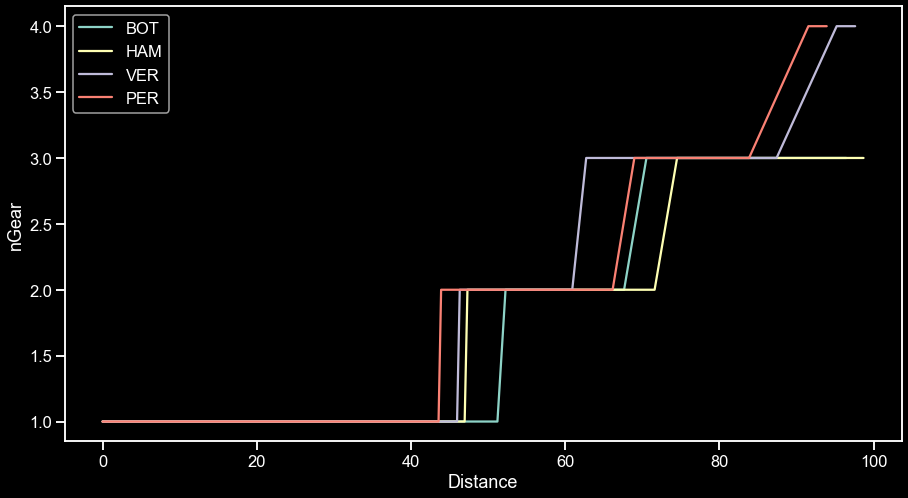

In [35]:
_distance = 100
_y = 'nGear'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

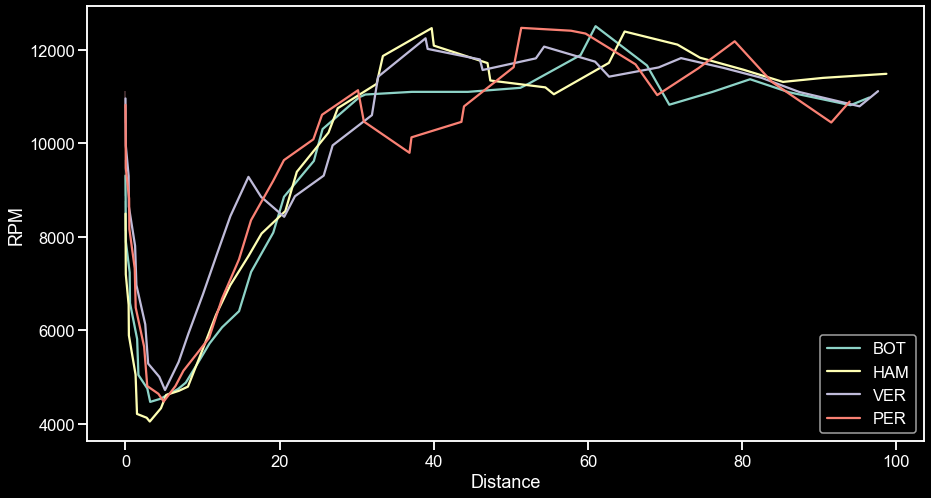

In [36]:
_distance = 100
_y = 'RPM'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

In [38]:
telemetry_vb.head(2)

Date            SessionTime DriverAhead  \
2 2021-11-07 19:03:04.837 0 days 01:02:03.441000               
3 2021-11-07 19:03:04.881 0 days 01:02:03.485000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2               1.096667        0 days 00:00:00  9613      0      1        22   
3               1.096667 0 days 00:00:00.044000  9630      0      1        22   

   Brake  DRS         Source  RelativeDistance   Status     X    Y      Z  \
2      0    1  interpolation          0.000003  OnTrack  1866  883  22270   
3      0    1            pos          0.000004  OnTrack  1867  884  22271   

   Distance  
2       0.0  
3       0.0